# Machine Learning paso a paso


In [68]:
#Lectura
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d
 
%matplotlib inline  

data = pd.read_csv('./train.csv')
#preprosesamiento
data = data.dropna(thresh=2)


X = np.c_[np.ones(data.shape[0]),data.iloc[:,0]]
y = np.c_[data.iloc[:,1]]

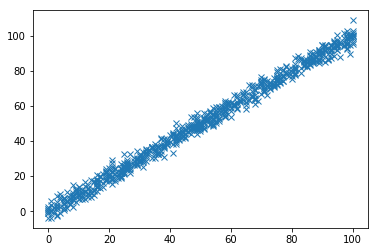

In [70]:
#Plot
plt.plot(X[:,1], y, 'x')

In [71]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    h = X.dot(theta)    
    J = np.sum(np.square(h-y))/(2*m)
    return(J)

computeCost(X, y)

1670.0624130893364

In [84]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.00001, num_iters=1000):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - (alpha*(X.T.dot(h-y)))/m
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

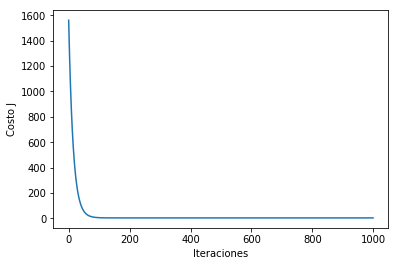

In [85]:
theta , Cost_J = gradientDescent(X, y)

plt.plot(Cost_J)
plt.ylabel('Costo J')
plt.xlabel('Iteraciones');

(0, 20)

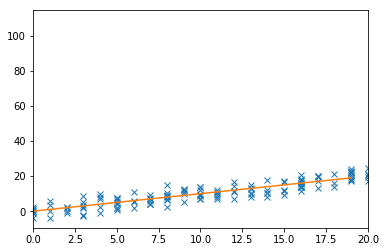

In [102]:
xx = np.arange(0,20)
yy = theta[0]+theta[1]*xx


plt.plot(X[:,1], y, 'x')
plt.plot(xx,yy, label='Linear regression (Gradient descent)')
plt.xlim(0,20)


In [116]:
#Usando sklearn 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

data_test = pd.read_csv('./test.csv')
data_test = data_test.dropna(thresh=2)


X_test = np.c_[np.ones(data_test.shape[0]),data_test.iloc[:,0]]
y_test = np.c_[data_test.iloc[:,1]]

model.score(X_test, y_test)
model.predict(X_test)

In [118]:
from sklearn.externals import joblib
joblib.dump(model, 'model.pkl') 

['model.pkl']